## Application of Supervised Learning using some basic regression models to predict the possible exam score of a student putting in a given amount of time into the preparation

Data set used: http://bit.ly/w-data

## Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
np.random.seed(45)

## Deploying the data

In [2]:
df_train = pd.read_csv('http://bit.ly/w-data')
print(df_train)
train_X = pd.DataFrame(df_train['Hours'])
train_y = df_train['Scores']

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
df_train.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Analysis of the data and pre-processing (if found to be necessary)

Before fitting the data using Linear Regression model, one must make sure if the underlying assumptions of the model are met.

The main assumptions of the model may be listed as follows:

1. The scatter plot between the feature and label must be linear
2. Normally deistributed residuals, with mean ($\mu$) = 0 and variance = $\sigma^2$ > 0.



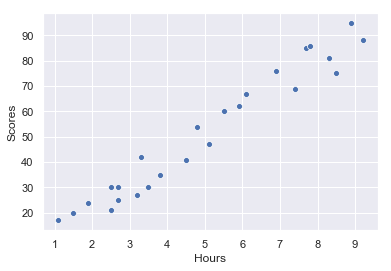

In [4]:
# Ensuring assumption 1 is satisfied
sns.scatterplot('Hours', 'Scores', data = df_train)

It is quite evident from the above scatter plot that the data is linearly separable, and hence the <b>$1^{st}$</b> assumption stated above is satisfied by the data. <b> Hence an explicit pre-processing step is unnecessary </b>

# Fitting the data

## Linear Regression from scratch


One good practice while experimenting with models is to try building simple linear models from scratch in order to truly understand the mechanism undelying the model.

## Preliminary

The rudimentary equation underlying the model.i.e., the one that governs the prediction output from the data is as follows:

y = $\theta_0 + \theta_1X_1 + \theta_2X_2 + ..+  \epsilon$  

where all the $X_j$ are the feature vectors (in our case it is 'Hours') and $\theta_j$ are the parameters of the model that are to be optimized to achieve the best fitting line.

But How do we optimize the model parameters?

There are a lot of ways to do so: <b> Stochastics Gradient Descent, Batch Gradient Descent, Mini-Batch Gradient Descent, etc. </b>

I will be using the <b>Batch gradient descent</b> method here.

According to the batch gradient descent, one may iterate over the following equation untill the global minimum (of the cost function) is achieved.

$\theta_j$ := $\theta_j$ - $\alpha$*$\Sigma_{i = 1}^{n}$($h_\theta(X^i) - y^i)*X^i_j$, where $\alpha$ is the learning rate (it decides the amount of jump necessary to reach the minimum of the cost function) and $X^i$, $y^i$ denotes to $i^{th}$ row of the features and labels. The hypothesis function (the one that governs the prediction values) is: $h_\theta(X) = \theta_0 + \theta_1X_1 + \theta_2X_2 + ....$

The assumption made here on the residual values ($\epsilon$) is that they should be normally distributed with mean 0. 

In [5]:
def Preprocessing(X, y = 0):
# To account for the intercept term.i.e., theta_0, the data must be added with an all ones column
    X.insert(0, "Ones", np.ones(X.shape[0])) 
    return X, y
X_train, y = Preprocessing(train_X, train_y)

In [6]:
# Model fitting from scratch

class LinearRegressor:
    def __init__(self, X, y, alpha, num_iter):
        self.X = X
        self.y = y
        self.alpha = alpha
        self.num_iter = num_iter
    def Model(self):
        self.theta = np.zeros(self.X.shape[1])
        columns = self.X.columns
        for i in range(self.num_iter):
            for j in range(self.X.shape[0]):
                for k in range(len(self.theta)):
                    self.theta[k] = self.theta[k] - self.alpha*np.sum((np.dot(self.X.iloc[j], self.theta) - self.y.iloc[j])*self.X[columns[k]][j])
        self.y_hat = np.dot(self.X, self.theta)
        return self.theta.tolist(), self.y_hat.tolist()

In [7]:
alpha = 0.001
num_iter = 1000

lr = LinearRegressor(X_train, y, alpha, num_iter)
theta = lr.Model()[0] # y-intercept and the slope of the line
y_hat = lr.Model()[1] # fitted values of scores

[Text(0, 0.5, 'residuals'),
 Text(0.5, 0, 'true scores'),
 Text(0.5, 1.0, 'Residual plot')]

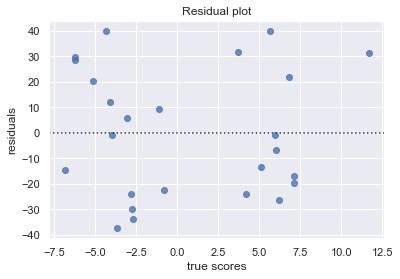

In [8]:
# Ensuring assumption 2 is satisfied
ax = sns.residplot(y_hat - train_y, train_y)
ax.set(title='Residual plot', xlabel='true scores', ylabel='residuals')

It is very evident from the above plot that the residuals are centered at 0 with roughly equal number of points on either side of the reference line. Hence assumption 2 is also satisfied.

Now we may be sure of using the model for predicting outcomes from new data

## Comparing the performance of the APIs (by sklearn) to the model created from scratch, using MAE cross-validation technique

By all obvious means, I don't claim that my "coded from scratch" model is the best one, but the model is quite valid and considerable given the fact that all the assumptions underlying the model are satisfied above.

## Linear Regression API from sklearn

In [9]:
train_X = train_X.drop(columns = 'Ones') # We don't require the extra ones column anymore

# Splitting the data for cross-validation
X_train_val, X_test_val, y_train, y_test = train_test_split(train_X, train_y, test_size=0.33, random_state=42)

In [10]:
# Using conventional Linear Regression
lr = LinearRegression()
lr.fit(X_train_val, y_train)
y_lr = lr.predict(X_test_val)
print('The MAE for predictions based on Linear regression is: {}'.format(mean_absolute_error(y_lr, y_test)))

# Using the model built from scratch
X_train_scratch, a = Preprocessing(train_X)
print('The MAE for predictions based on regression model built from scratch is: {}'.format(mean_absolute_error(np.dot(X_train_scratch, theta), train_y)))

The MAE for predictions based on Linear regression is: 4.564015037730867
The MAE for predictions based on regression model built from scratch is: 4.937591116686244


### Wait, can we achieve a better accuracy using other models such as regularized LR (ridge and lasso) or SVM ?

## Ridge Regression

In [11]:
ridge_lr = Ridge(alpha=10**(-10))
ridge_lr.fit(X_train_val, y_train)
y_ridge_lr = ridge_lr.predict(X_test_val)
print('The MAE for predictions based on Ridge regression is : {}'.format(mean_absolute_error(y_ridge_lr, y_test)))

The MAE for predictions based on Ridge regression is : 4.564015037732243


## Lasso Regression

In [12]:
lasso_lr = Lasso(alpha=10**(-10))
lasso_lr.fit(X_train_val, y_train)
y_lasso_lr = lasso_lr.predict(X_test_val)
print('The MAE for predictions based on Lasso regression is: {}'.format(mean_absolute_error(y_lasso_lr, y_test)))

The MAE for predictions based on Lasso regression is: 4.564015037733149


## SVM 

In [13]:
svr = SVR(gamma = 'auto', C = 23)
svr.fit(X_train_val, y_train)
y_svr = svr.predict(X_test_val)
print('The MAE for predictions based on SVM regression is: {}'.format(mean_absolute_error(y_svr, y_test)))

The MAE for predictions based on SVM regression is: 5.5182491900599615


| Ranking (topmost being the best) | Model | Mean Absolute error ($L_1$ error) |
| --- | --- | --- |
| 1 | Ridge regression | 4.564 + 22 * $10^{-13}$ |
| 2 | Lasso Regression | 4.564 + 33 * $10^{-13}$|
| 3 | Linear regression by sklearn | 4.564 + 86*$10^{-13}$|
| 4 | Linear regression from scratch | 4.937 |
| 5 | Support Vector Machine (SVM) Regressor | 5.518 |

### Probably, the best model out of the above experimented models is the Ridge Regressor (by a very small margin!)

## Predictions

[Text(0.5, 1.0, 'Regression line')]

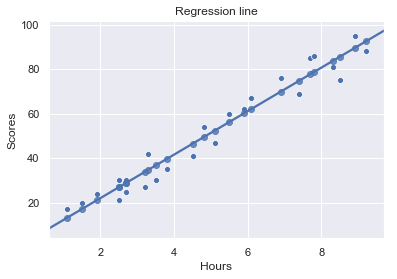

In [14]:
train_X = train_X.drop(columns = 'Ones')

ridge_lr = Ridge(alpha = 10**(-10))
ridge_lr.fit(train_X, train_y)
X_test = pd.DataFrame({'Hours': [9.25]})

ax = sns.scatterplot('Hours', 'Scores', data=df_train)
ax = sns.regplot('Hours', ridge_lr.predict(train_X), data=df_train)
ax.set(title='Regression line')

In [15]:
print('The slope of the linear plot which best fits the data is: {}'.format(ridge_lr.coef_[0]))
print('The intercept of the linear plot which best fits the data is: {}'.format(ridge_lr.intercept_))

The slope of the linear plot which best fits the data is: 9.775803390781086
The intercept of the linear plot which best fits the data is: 2.4836734054051988


In [16]:
y_pred = ridge_lr.predict(X_test).tolist()[0]
print('The predicted Score of the student if he/she puts in 9.25 hrs of work is: {}'.format(y_pred))

The predicted Score of the student if he/she puts in 9.25 hrs of work is: 92.90985477013024


## Conclusion

#### The student is predicted to obtain a score of about 93 on spending 9.25 hrs of study time.